In [1]:
import pandas as pd
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

In [4]:
# pandas as pd:imports library for handling and analyzing struture
# statsmodels.graphics.tsaplots as tsa_plots: Import Time Series plotting functions such as ACF And PACF
# from statsmodels.tsa.arima.model import ARIMA: imports the Arima model for time-series forecasting
# from sklearn.metrics import mean_squared_error: used for evaluating forecast



In [6]:
Walmart=pd.read_csv("C:/18-Time_Series/Walmart Footfalls Raw.csv")
#Data partition
Train=Walmart.head(147)
Test=Walmart.tail(12)

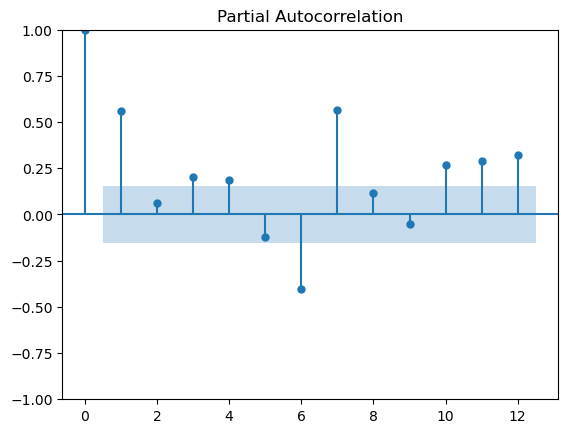

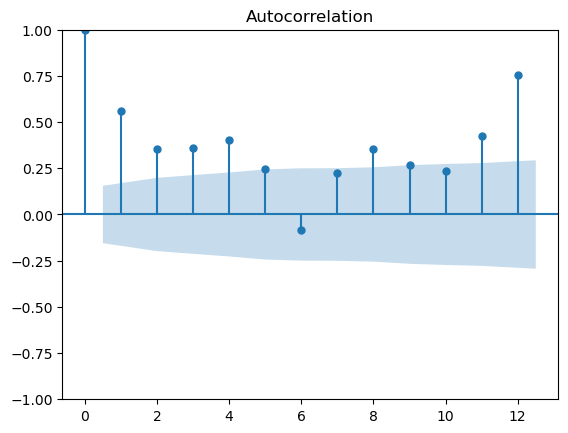

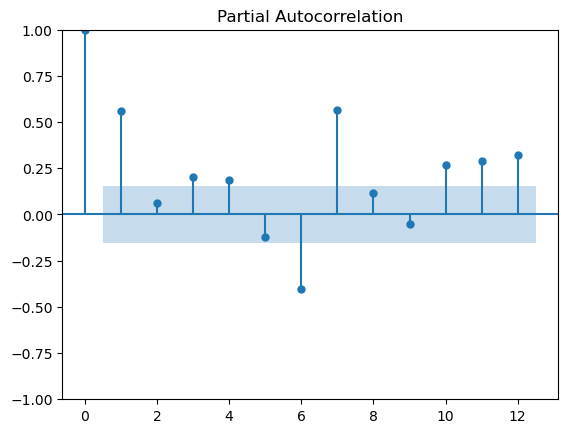

In [7]:
tsa_plots.plot_acf(Walmart.Footfalls,lags=12)
tsa_plots.plot_pacf(Walmart.Footfalls,lags=12)

When analyzing ACF and PACF plots,we follow these rules:


 AR order (p )of pacf:
     
Look at the Partial Autocorrelation Function (PACF) plot.
The number of significant lags before the PACF drops near to zero suggests the AR model.
IF PACF shows a sharp cutoff after lag 4.we take AR(4).


  MA order (q) from ACF:    

Look at the Auto correlation Function (ACF) plot.
The number of significant lags before the ACF drops near to the zero suggests.
IF ACF shows a sharp cutoff after lag 6,we take MA(6).


First you try p=4 and q=4
Then you try p=4 and q=6


#### ARIMA with AR=4, MA=6

In [8]:
model1 = ARIMA(Train.Footfalls, order =(4,1,6))
res1 = model1.fit()
print(res1.summary())

                               SARIMAX Results                                
Dep. Variable:              Footfalls   No. Observations:                  147
Model:                 ARIMA(4, 1, 6)   Log Likelihood                -895.497
Date:                Thu, 30 Jan 2025   AIC                           1812.995
Time:                        15:47:45   BIC                           1845.814
Sample:                             0   HQIC                          1826.330
                                - 147                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7448      0.631     -1.181      0.238      -1.981       0.492
ar.L2         -0.7813      0.373     -2.096      0.036      -1.512      -0.051
ar.L3         -0.7346      0.633     -1.160      0.2

C:\Users\aadit\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Creates an ARIMA model with:
AR(Auto-Regressive) term 4
I (Intergrated) term=1(indicates first order differencing to make the data stationary)
MA(Moving Average) term 6

When to use differencing ( d in ARIMA)
Before selecting p and q, ensure the time series is stationary:
    
If the mean and variance change over time, apply differencing.
Use the Augmented Dicky-Fuller(ADF) test to check for stationarity.
If the series is not stationary, apply first-order differencing (d=1).

from statsmodels.tsa.stattools import adfuller
result = adfuller(Walmart.Footfalls)
print('ADF Statistics:', result[0])
print('p-value:',result[1])

If p-value>0.05, the series is not stationary, so apply differencing(d=1)

### Forecast for next 12 months

In [9]:
start_index = len(Train)
end_index = start_index + 11
forecast_test = res1.predict(start=start_index, end = end_index)

In [10]:
print(forecast_test)

147    1918.896721
148    1870.740015
149    1861.331584
150    2021.328230
151    1979.624894
152    1834.870843
153    1855.649250
154    2019.311289
155    1978.288218
156    1833.678203
157    1857.805981
158    2019.172247
Name: predicted_mean, dtype: float64


start_index = len(Train) : Begins prediction after the training dataset.

end_index = start_index + 11 : Predicts the next 12 periods.

forecast_test = res1.predict(start=start_index, end = end_index): Generates forecasts

### Evaluate forecasts

In [11]:
rmse_test = sqrt(mean_squared_error(Test.Footfalls, forecast_test))
print('Test RMSE: %.3f'%rmse_test)

Test RMSE: 173.305


#### Plot forecasts against actual outcomes

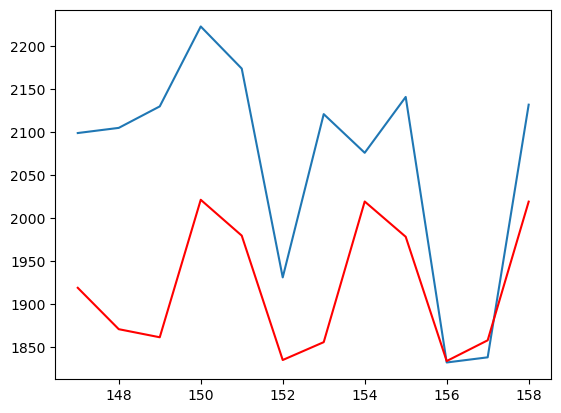

In [15]:
pyplot.plot(Test.Footfalls)
pyplot.plot(forecast_test, color='red')
pyplot.show()

# Actual value: blue
# Predicted value: red

In [16]:
# Auto-ARIMA - Automatically discover the optimal order for an ARIMA model
# pip install pmdarina --user

pmdarina is an Auto-ARIMA package that automatically selects the best(p,d)

start_p = 0, start_q = 0: Initial values for AR and MA terms.

max_p = 12, max_q=12: Maximum values for AR and MA.

m=1: Indicates a non-seasonal model.

d = None: Automatically determines the differencing order.

seasonal =False: Disables seasonal components.

trace = True: Displays the selection process

stepwise = True: Uses a stepwise approach for efficiency

In [17]:
import pmdarima as pm

In [19]:
ar_model = pm.auto_arima(Train.Footfalls, start_p=0, start_q = 0, max_p = 12, max_q=12, m=1, d=None, seasonal=False, start_P=0, trace = True, error_action = 'warn', stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1916.696, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1908.134, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1887.358, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1914.726, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1874.405, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1875.051, Time=0.54 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1874.985, Time=0.66 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1873.101, Time=0.33 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1874.951, Time=0.71 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1869.771, Time=0.83 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.31 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1859.122, Time=0.99 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1853.611, Time=1.36 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=1

#### Best Parameters ARIMA
ARIMA woth AR=3, I=1, MA=5

In [20]:
model = ARIMA(Train.Footfalls, order = (3,1,5))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:              Footfalls   No. Observations:                  147
Model:                 ARIMA(3, 1, 5)   Log Likelihood                -894.698
Date:                Thu, 30 Jan 2025   AIC                           1807.397
Time:                        16:28:17   BIC                           1834.249
Sample:                             0   HQIC                          1818.308
                                - 147                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4435      0.261      1.701      0.089      -0.068       0.955
ar.L2         -0.9942      0.011    -87.432      0.000      -1.016      -0.972
ar.L3          0.4478      0.262      1.706      0.0

C:\Users\aadit\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Forecast for next 12 months

In [29]:
start_index = len(Train)
end_index = start_index+11
forecast_best = res.predict(start=start_index, end = end_index)
print(forecast_best)

147    1947.224820
148    1861.761795
149    1860.687534
150    2001.562178
151    1970.693682
152    1816.465070
153    1841.830275
154    1992.591618
155    1965.180496
156    1814.494703
157    1842.420844
158    1992.343852
Name: predicted_mean, dtype: float64


#### Evaluate forecast

In [30]:
rmse_best = sqrt(mean_squared_error(Test.Footfalls, forecast_best))
print('Test RMSE: %.3F'% rmse_best)

Test RMSE: 181.165


#### Plot forecast against actual outcomes

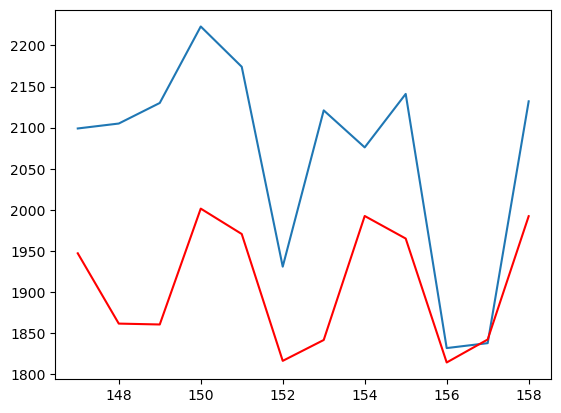

In [31]:
pyplot.plot(Test.Footfalls)
pyplot.plot(forecast_best, color='red')
pyplot.show()